In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk

from collections import Counter
from typing import List

import seaborn
seaborn.set(palette='summer')

/Users/anatolii/Desktop/movies_subtitles/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/anatolii/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
device = 'mps' if torch.mps.is_available() else 'cpu'
device

'mps'

## Подготовка данных

In [4]:
df = pd.read_csv('medium_articles.csv')
df.fillna("None", inplace=True)
_, test = train_test_split(df, test_size=0.2, random_state=42)

In [5]:
test.sample(10)

,title,text,url,authors,timestamp,tags
113540,Story Selling: Using Email to Drive Sales,"Do all the conversations about story selling, ...",https://medium.com/@lindajamesbennett/story-se...,['Linda James Bennett At Shinyobjectmarketing....,2020-12-14 00:07:50.757000+00:00,"['Life Coach', 'Business Strategy', 'Business'..."
136329,How schools can clear the path to college | XQ...,The road to college can be complicated and fil...,https://medium.com/xqamerica/how-schools-can-c...,['The Xq Team'],2020-03-02 21:13:24.551000+00:00,"['Students', 'College', 'High School', 'Educat..."
70015,Bitstamp Set To Stop Trading Of XRP For US-Bas...,Luxembourg-based cryptocurrency exchange – Bit...,https://medium.com/@Voremcrypto./bitstamp-set-...,[],2020-12-26 04:06:51.152000+00:00,"['Cryptocurrency', 'Ripple', 'Digital', 'Inves..."
120040,Underscore phenomena in python,My first encounter with underscores was when I...,https://medium.com/analytics-vidhya/underscore...,['Muhammad Hanif'],2020-12-02 16:28:33.107000+00:00,"['Oop Concepts', 'Object Oriented', 'Python', ..."
40707,Through Love,I wish to speak to somebody\n\n… but nobody re...,https://medium.com/broads-non-grata/through-lo...,['Shringi Kumari'],2020-10-28 12:39:21.605000+00:00,"['Colonialism', 'Humanity', 'Poetry', 'Isolati..."
190396,Catgirl Weekly Progress Report — 12–29–2021,"Introduction\n\nThe new year is coming up, and...",https://medium.com/@catgirlteam/catgirl-weekly...,[],2021-12-30 02:44:56.563000+00:00,"['Catgirlcoin', 'Bnb', 'Cryptocurrency', 'Bsc'..."
55791,Upgrading a Dev Container to .NET 5.0,Improving the Dev Container\n\nUpgrading the ....,https://medium.com/swlh/upgrading-a-dev-contai...,['Manfred Lange'],2020-12-29 07:31:17.436000+00:00,"['Net5', 'Vscode', 'Net Core', 'Docker', 'Devc..."
68263,reinforcement learning,Reinforcement learning systems do not neessari...,https://medium.com/i-want-to-build-a-brain-in-...,[],2020-12-25 17:01:44.830000+00:00,"['Neuroscience', 'Cognitive Computing', 'Brain..."
28209,The Throw Keyword was a Mistake,Photo by Kelly Sikkema on Unsplash\n\nThe Thro...,https://medium.com/swlh/the-throw-keyword-was-...,['Chris Fox'],2019-12-20 17:00:10.307000+00:00,"['Software Development', 'Exception Handling',..."
122059,5 Career Building Hobbies You Can Learn Now,We all love to pursue our interests and some f...,https://medium.com/@betterthinkingsolutions/5-...,['Better Thinking Solutions'],2020-12-26 07:54:31.320000+00:00,"['Hobbies And Activities', 'Career Advice', 'C..."


In [6]:
sentences = []

for block in tqdm(test['text']):
    for sentence in block.split('\n'):
        tokenized_sentences = [x.lower() for x in sent_tokenize(sentence)]
        sentences.extend(tokenized_sentences)


100%|██████████| 38474/38474 [00:12<00:00, 3028.00it/s]


In [7]:
sentences

['→ flagman',
 'it seems logical to start the investigation from the roots.',
 'the largest cryptocurrency bitcoin has just celebrated its 9th birthday and is not planning on going anywhere.',
 'currently being valued at around $12,000 usd, crypto ‘patient zero’ has enjoyed 1,470% rise in 2017.',
 'what is more, bitcoin has been declared dead by mainstream media for more than 230 times but is still alive and kicking (check the full list here).',
 'what doesn’t kill you, really makes you stronger and apparently, more expensive.',
 'patient zero has passed the hype check-up.',
 'it’s real.',
 '99bitcoins.com lists all publications by the mainstream media declaring death of bitcoin',
 '→ teammates',
 'what bitcoin started, many lined up to follow.',
 'the crypto team currently counts over 1,400 cryptocurrencies and crypto tokens listed in coinmarketcap.com — from dentacoin, a token-based initiative to improve dental care worldwide, dogecoin, a cryptocurrency started by internet trolls as 

# Пословная токенизация

In [8]:
word_counter = Counter()
for sentence in tqdm(sentences):
    words = word_tokenize(sentence)
    word_counter.update(words)

100%|██████████| 2219768/2219768 [01:17<00:00, 28610.02it/s]


In [9]:
word_counter

Counter({'the': 1623172,
         ',': 1600736,
         '.': 1580697,
         'to': 1009394,
         'and': 881753,
         'of': 774909,
         'a': 751232,
         'in': 533129,
         '’': 502884,
         'is': 434937,
         'that': 407796,
         'you': 374014,
         'i': 351272,
         'it': 350237,
         'for': 331598,
         'with': 243934,
         'on': 233476,
         ':': 232555,
         'this': 229358,
         's': 225723,
         'we': 225008,
         'are': 217938,
         'as': 215037,
         ')': 206781,
         '(': 201411,
         'be': 196219,
         'can': 173776,
         'your': 171858,
         'have': 159494,
         'or': 151261,
         'not': 140220,
         'was': 139886,
         '”': 136362,
         '“': 134344,
         'from': 133785,
         'by': 127589,
         'but': 126680,
         'an': 122536,
         'they': 121946,
         'will': 120479,
         't': 120181,
         'my': 119641,
         'at': 11

In [10]:
len(word_counter)

464471

In [37]:
vocab = set(['<unk>', '<bos>', '<eos>', '<pad>'])
counter_threshold = 250

for word, cnt in word_counter.items():
    if cnt > counter_threshold:
        vocab.add(word)

In [38]:
vocab

{'attending',
 'acting',
 'governments',
 'sink',
 'jump',
 'prospect',
 'walmart',
 'socially',
 'mentioned',
 'protects',
 'arr',
 'financially',
 'accessed',
 'partial',
 'numbers',
 'flowers',
 'gang',
 'organisation',
 'weapons',
 'aaron',
 'members',
 'learners',
 'forecasting',
 'company',
 'observe',
 'product',
 'fruits',
 'voices',
 'taxes',
 'geographical',
 'possess',
 'minority',
 'jwt',
 'try',
 'inception',
 'symptoms',
 'kill',
 'captured',
 'forward',
 'opponent',
 'files',
 'figuring',
 'activist',
 'limited',
 'laughter',
 'involves',
 'comparing',
 'inherent',
 'integers',
 'edit',
 'within',
 'can',
 'creation',
 'origin',
 'enabling',
 'broad',
 'dose',
 'breakfast',
 'relies',
 'considerations',
 'star',
 'marathon',
 'perhaps',
 'asynchronous',
 ']',
 'iraq',
 'harder',
 'scott',
 'convenient',
 'fastest',
 'reactions',
 'addresses',
 'discover',
 'immigrant',
 'wash',
 'scala',
 'shaped',
 'spin',
 'adds',
 'island',
 'etc.',
 'categorical',
 'zoom',
 'thought'

In [13]:
len(vocab)

8333

In [39]:
word2ind = {word: i for i, word in enumerate(vocab)}
ind2word = {i: word for word, i in word2ind.items()}

In [15]:
class WordDataset(Dataset):
    def __init__(self, sentences):
        self.data = sentences
        self.unk_id = word2ind['<unk>']
        self.bos_id = word2ind['<bos>']
        self.eos_id = word2ind['<eos>']
        self.pad_id = word2ind['<pad>']

    def __getitem__(self, idx: int):
        sentence = self.data[idx]
        tokenized_sentence = [self.bos_id] + [word2ind.get(word, self.unk_id) for word in word_tokenize(sentence)] + [self.eos_id]
        return tokenized_sentence

    def __len__(self):
        return len(self.data)

In [16]:
def collate_fn_with_padding(input_batch, pad_id=word2ind['<pad>']):
    seq_lens = [len(x) for x in input_batch]
    max_seq_len = max(seq_lens)

    new_batch = []
    for sequence in input_batch:
        sequence += [pad_id] * (max_seq_len - len(sequence))
        new_batch.append(sequence)

    sequences = torch.LongTensor(new_batch).to(device)

    return {'input_ids': sequences[:, :-1], 'target_ids': sequences[:, 1:]}

dataset = WordDataset(sentences)
dataloader = DataLoader(dataset, collate_fn=collate_fn_with_padding, batch_size=64)

In [17]:
class BiLSTMModel(nn.Module):
    def __init__(self, hidden_dim: int, vocab_size: int, output_dim: int):
        super(BiLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, hidden_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.linear = nn.Linear(hidden_dim*2, hidden_dim)
        self.projection = nn.Linear(hidden_dim, output_dim)
        self.dropout = nn.Dropout(p=0.2)
        self.non_lin = nn.Tanh()

    def forward(self, input_batch) -> torch.Tensor:
        embeddings = self.embedding(input_batch)  
        lstm_out, _ = self.lstm(embeddings) 
        out = self.non_lin(self.dropout(self.linear(lstm_out)))
        projection = self.projection(out)  

        return projection

In [18]:
model = BiLSTMModel(hidden_dim=256, vocab_size=len(vocab), output_dim=len(vocab)).to(device)
criterion = nn.CrossEntropyLoss(ignore_index=word2ind['<pad>'])
optimizer = torch.optim.Adam(model.parameters())

In [19]:
import gc
import torch

# Уменьшаем размер батча и увеличиваем частоту обновления
num_epoch = 10
losses = []
accumulation_steps = 8  # Увеличиваем количество шагов накопления
optimizer.zero_grad()

for epoch in range(num_epoch):
    epoch_losses = []
    model.train()
    
    # Очищаем кэш перед началом эпохи
    gc.collect()
    torch.mps.empty_cache()
    
    with tqdm(dataloader, desc=f'Training epoch {epoch+1}') as pbar:
        for i, batch in enumerate(pbar):
            try:
                # Перемещаем батч на устройство и сразу удаляем оригинал
                with torch.no_grad():  # Отключаем градиенты для входных данных
                    input_ids = batch['input_ids'].to(device)
                    target_ids = batch['target_ids'].to(device)
                del batch
                
                # Получаем логиты и сразу используем их
                logits = model(input_ids)
                logits = logits.flatten(start_dim=0, end_dim=1)
                del input_ids
                
                # Вычисляем loss
                loss = criterion(logits, target_ids.flatten()) / accumulation_steps
                del logits, target_ids
                
                # Обратное распространение
                loss.backward()
                
                # Обновляем веса только после накопления градиентов
                if (i + 1) % accumulation_steps == 0:
                    optimizer.step()
                    optimizer.zero_grad()
                    torch.mps.empty_cache()
                
                # Сохраняем значение loss и очищаем
                current_loss = loss.item() * accumulation_steps
                epoch_losses.append(current_loss)
                pbar.set_postfix({'loss': current_loss})
                del loss, current_loss
                
                # Более частая очистка кэша
                if i % 3 == 0:  # Увеличиваем частоту очистки
                    gc.collect()
                    torch.mps.empty_cache()
                    
            except RuntimeError as e:
                if "out of memory" in str(e):
                    if torch.mps.is_available():
                        torch.mps.empty_cache()
                    print(f"WARNING: out of memory at batch {i}. Skipping batch.")
                    continue
                else:
                    raise e
    
    # Вычисляем среднюю потерю и сохраняем
    epoch_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1} Average Loss: {epoch_loss}')
    
    # Очищаем все временные переменные
    del epoch_losses, epoch_loss
    gc.collect()
    torch.mps.empty_cache()
    
    # Сохраняем модель после каждой эпохи
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': losses[-1],
    }, f'model_checkpoint_epoch_{epoch+1}.pt')
    
    # Принудительная очистка после сохранения
    gc.collect()
    torch.mps.empty_cache()

Training epoch 1:  73%|███████▎  | 25479/34684 [43:10<1:04:50,  2.37it/s, loss=0.00371]

Training epoch 1: 100%|██████████| 34684/34684 [58:36<00:00,  9.86it/s, loss=0.00124]  


Epoch 1 Average Loss: 0.3664006850306463


Training epoch 2:  73%|███████▎  | 25479/34684 [42:56<1:03:04,  2.43it/s, loss=0.02]    

Training epoch 2: 100%|██████████| 34684/34684 [58:14<00:00,  9.92it/s, loss=0.00228]  


Epoch 2 Average Loss: 0.10218726266576886


Training epoch 3:  73%|███████▎  | 25479/34684 [42:33<1:08:40,  2.23it/s, loss=0.00255] 

Training epoch 3: 100%|██████████| 34684/34684 [57:51<00:00,  9.99it/s, loss=0.000695]  


Epoch 3 Average Loss: 0.003066523814337126


Training epoch 4:  73%|███████▎  | 25479/34684 [42:31<1:11:03,  2.16it/s, loss=0.000631]

Training epoch 4: 100%|██████████| 34684/34684 [57:51<00:00,  9.99it/s, loss=0.000219]  


Epoch 4 Average Loss: 0.001239347742923359


Training epoch 5:  73%|███████▎  | 25479/34684 [42:29<1:03:48,  2.40it/s, loss=0.000158]

Training epoch 5: 100%|██████████| 34684/34684 [57:48<00:00, 10.00it/s, loss=4.89e-5]   


Epoch 5 Average Loss: 0.0003715280469303112


Training epoch 6:  73%|███████▎  | 25479/34684 [42:26<1:04:48,  2.37it/s, loss=6.53e-5] 

Training epoch 6: 100%|██████████| 34684/34684 [57:45<00:00, 10.01it/s, loss=1.25e-5]  


Epoch 6 Average Loss: 0.00019699030274460166


Training epoch 7:  73%|███████▎  | 25479/34684 [42:28<1:03:29,  2.42it/s, loss=2.35e-5] 

Training epoch 7: 100%|██████████| 34684/34684 [57:46<00:00, 10.01it/s, loss=7.16e-6]  


Epoch 7 Average Loss: 3.659543692806813e-05


Training epoch 8:  73%|███████▎  | 25479/34684 [42:29<1:03:42,  2.41it/s, loss=0.000109]

Training epoch 8: 100%|██████████| 34684/34684 [57:46<00:00, 10.00it/s, loss=3.77e-6]   


Epoch 8 Average Loss: 0.00018221001784388322


Training epoch 9:  73%|███████▎  | 25479/34684 [42:33<1:04:48,  2.37it/s, loss=4.13e-5] 

Training epoch 9: 100%|██████████| 34684/34684 [57:51<00:00,  9.99it/s, loss=9.17e-6]  


Epoch 9 Average Loss: 4.299961657339595e-05


Training epoch 10:  73%|███████▎  | 25479/34684 [42:27<1:04:41,  2.37it/s, loss=2.05e-5] 

Training epoch 10: 100%|██████████| 34684/34684 [57:44<00:00, 10.01it/s, loss=4.96e-6]  


Epoch 10 Average Loss: 9.14175193400123e-05


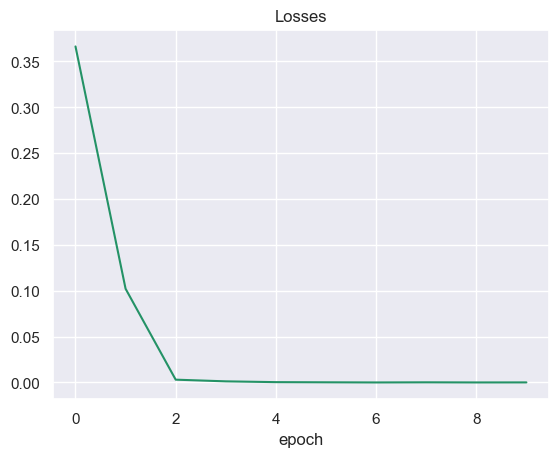

In [20]:
plt.plot(np.arange(len(losses)), losses)
plt.title('Losses')
plt.xlabel("epoch")
plt.show()

In [46]:
model_dict = torch.load('model_checkpoint_epoch_2.pt')
model = BiLSTMModel(hidden_dim=256, vocab_size=len(vocab), output_dim=len(vocab)).to(device)
model.load_state_dict(model_dict['model_state_dict'])
model.eval()
model.to(device)


BiLSTMModel(
  (embedding): Embedding(8333, 256)
  (lstm): LSTM(256, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=256, bias=True)
  (projection): Linear(in_features=256, out_features=8333, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (non_lin): Tanh()
)

In [49]:
def generate_text(
    model: nn.Module,
    starting_seq: str,
    word2ind: dict,
    ind2word: dict,
    max_length: int = 25,
    temperature: float = 1.0,
    top_k: int = 5,
    device: str = 'mps'
) -> str:
    model = model.to(device)
    model.eval()
    
    # Разбиваем начальную последовательность на слова
    words = word_tokenize(starting_seq)
    print("Начальные слова:", words)  # Отладочная информация
    
    input_ids = [word2ind['<bos>']] + [word2ind.get(word, word2ind['<unk>']) for word in words]
    print("Индексы слов:", input_ids)  # Отладочная информация
    
    input_ids = torch.LongTensor(input_ids).unsqueeze(0).to(device)
    generated_words = words.copy()
    
    with torch.no_grad():
        for _ in range(max_length):
            logits = model(input_ids)[0, -1, :]
            logits = logits / temperature
            top_k_logits, top_k_indices = torch.topk(logits, min(top_k, len(logits)))
            probs = torch.softmax(top_k_logits, dim=-1)
            next_word_idx = top_k_indices[torch.multinomial(probs, 1)].item()
            
            if next_word_idx == word2ind['<eos>']:
                break
                
            next_word = ind2word[next_word_idx]
            print(f"Сгенерировано слово: {next_word} (индекс: {next_word_idx})")  # Отладочная информация
            
            # Пропускаем неизвестные слова
            if next_word == '<unk>':
                continue
                
            generated_words.append(next_word)
            
            input_ids = torch.cat([
                input_ids,
                torch.LongTensor([[next_word_idx]]).to(device)
            ], dim=1)
    
    return ' '.join(generated_words)

In [50]:
# Пример использования:
test_sequences = [
    'you know',
    'i think',
    'the best',
    'in my opinion'
]

for seq in test_sequences:
    generated = generate_text(
        model=model,
        starting_seq=seq,
        word2ind=word2ind,
        ind2word=ind2word,
        temperature=1.8,
        top_k=10
    )
    print(f"\nНачальная последовательность: '{seq}'")
    print(f"Сгенерированный текст: '{generated}'")

Начальные слова: ['you', 'know']
Индексы слов: [3240, 6441, 8021]
Сгенерировано слово: emails (индекс: 4955)
Сгенерировано слово: opportunities (индекс: 267)
Сгенерировано слово: volunteers (индекс: 5600)
Сгенерировано слово: opportunities (индекс: 267)
Сгенерировано слово: opportunities (индекс: 267)
Сгенерировано слово: opportunities (индекс: 267)
Сгенерировано слово: opportunities (индекс: 267)
Сгенерировано слово: opportunities (индекс: 267)
Сгенерировано слово: opportunities (индекс: 267)
Сгенерировано слово: hunger (индекс: 1062)
Сгенерировано слово: opportunities (индекс: 267)
Сгенерировано слово: opportunities (индекс: 267)
Сгенерировано слово: opportunities (индекс: 267)
Сгенерировано слово: iterations (индекс: 4335)
Сгенерировано слово: tutorial (индекс: 3542)
Сгенерировано слово: followed (индекс: 2873)
Сгенерировано слово: genuine (индекс: 4511)
Сгенерировано слово: figures (индекс: 2990)
Сгенерировано слово: figures (индекс: 2990)
Сгенерировано слово: figures (индекс: 2990